# Precidtion of Condition Based on Reviews Using Naive Bayes, SVM, Random Forest

# Student Name : Hitesh Thadhani


# Group Members : Hitesh Thadhani, Harshita Asnani, Laxman Kumar



# Subject Name : IST 736 Text Mining

# University : Syracuse University

# Professor : Prof Yingya Li

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the cleaned data

data = pd.read_csv('C:\\Users\\hites\\Downloads\\cleaned.csv')

# Subset Data for top 10 conditions and their reviews to predict condition based on reviews for these top 10 conditions

In [3]:
# Getting the conditions along with their count of occurence in the dataset

con_top_rev = dict(data['condition'].value_counts())

In [4]:
# Selecting the top 10 conditions based on the count

condtn_top_rev = list(con_top_rev.keys())[0:10]

In [5]:
# Grouping the reviews of the top 10 conditions found above to create a subset of data

cntn_rev = dict(data.groupby(['condition'])['review'].value_counts())

In [6]:
# Creating pandas dataframe consisting of conditions along with their reviews

cls_df_rev = pd.DataFrame(cntn_rev.keys(),columns=['Condition','review'])

In [7]:
# Creating pandas dataframe consisting of only top 10 conditions along with their reviews by filtering other conditions

clas_df_rev = cls_df_rev[cls_df_rev.Condition.isin(condtn_top_rev)]

In [8]:
clas_df_rev.shape

(50104, 2)

# Stemming the data for further processing

In [9]:
# Initialize Snowball Stemmer

import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')

In [10]:
# Function to perform stemming of the reviews

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [english_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [11]:
# Stemming the Reviews 

clas_df_rev['review'] = clas_df_rev['review'].apply(stem_sentences)


C:\Users\hites\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [295]:
clas_df_rev.to_csv('Condition_Predict_IST736.csv')

# Hold out test for various Algorithms

In [12]:
# Data Assigning for train data
y_train=clas_df_rev['Condition'].values
X_train=clas_df_rev['review'].values

In [13]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(40083,) (40083,) (10021,) (10021,)
i ve had my implant for 3 year in april it has prevent pregnanc but the side effect have been aw i ve gain 5 stone in weight i have had huge spot come up all over my bodi but main on my face and neck i ve use everi spot treatment out there includ medic from my doctor i ve had tender breast most of the time and have no energi at all i ve spent the last 3 year on diet and exercis and even use weight loss pill and the weight will not shift to the ladi that ask about pregnanc after the implant it is possibl to have a healthi pregnanc after it remov i know 2 peopl that have had healthi children sinc i hope you see this and it help i will not be have a replac after my experi with it
Birth Control
have taken tramadol in the past it liter save my life when i was go through sever depress while slowli recov from a traumat injuri my doctor at the time put me on a light dose of tramadol to help with my somber mood i was aliv again nowaday it virtual imposs to ge

In [14]:
# Validation of train data
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

{'Obesity', 'Birth Control', 'Weight Loss', 'Anxiety', 'ADHD', 'Bipolar Disorde', 'Depression', 'Acne', 'Pain', 'Insomnia'}
[['ADHD' 1771]
 ['Acne' 3164]
 ['Anxiety' 3454]
 ['Bipolar Disorde' 2280]
 ['Birth Control' 14531]
 ['Depression' 5067]
 ['Insomnia' 2245]
 ['Obesity' 1979]
 ['Pain' 3517]
 ['Weight Loss' 2075]]


C:\Users\hites\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """


In [300]:
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#  unigram boolean vectorizer
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5,ngram_range=(1,2),stop_words='english')

#  unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5,stop_words='english')

#  unigram and bigram term frequency vectorizer
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', min_df=5,ngram_range=(1,2),stop_words='english')

#  unigram tfidf vectorizer
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,ngram_range=(1,3) ,min_df=5,stop_words='english')


In [301]:
# Vectorize the train data 

X_fit = unigram_tfidf_vectorizer.fit(X_train)
X_transform = X_fit.transform(X_train)
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_tfidf_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_tfidf_vectorizer.vocabulary_.items())[:50])
# check word index in vocabulary
print(unigram_tfidf_vectorizer.vocabulary_)

(40083, 72390)
[[0. 0. 0. ... 0. 0. 0.]]
72390
[('ve', 65585), ('implant', 31976), ('year', 71362), ('april', 6226), ('prevent', 50395), ('pregnanc', 49793), ('effect', 21233), ('aw', 6716), ('gain', 26510), ('stone', 59092), ('weight', 68754), ('huge', 31485), ('spot', 57649), ('come', 12531), ('bodi', 10212), ('main', 38319), ('face', 23942), ('neck', 42996), ('use', 64934), ('everi', 22594), ('treatment', 63781), ('includ', 32161), ('medic', 39190), ('doctor', 18689), ('tender', 61255), ('breast', 10720), ('time', 62245), ('energi', 22281), ('spent', 57584), ('diet', 18039), ('exercis', 23212), ('loss', 37381), ('pill', 48342), ('shift', 55316), ('ladi', 34607), ('ask', 6336), ('possibl', 49503), ('healthi', 29625), ('remov', 53066), ('know', 34397), ('peopl', 47141), ('children', 11984), ('sinc', 55629), ('hope', 30657), ('help', 29887), ('replac', 53167), ('experi', 23357), ('ve implant', 65889), ('implant year', 32043), ('prevent pregnanc', 50404)]
{'ve': 65585, 'implant': 31976,

In [290]:
# Vocabulary of words

vocab = list(gram12_count_vectorizer.vocabulary_.keys())

In [291]:
vocab

['ve',
 'great',
 'results',
 'medication',
 'effects',
 'listed',
 'dry',
 'mouth',
 'numbness',
 'toes',
 'used',
 'properly',
 'help',
 'loose',
 'weight',
 'aid',
 'journey',
 'best',
 'friends',
 'quot',
 'feels',
 'like',
 'just',
 'ate',
 'thanksgiving',
 'meal',
 'everytime',
 'suffer',
 'migraines',
 'works',
 'qsymia',
 'website',
 'offer',
 'savings',
 'coupon',
 'pharmacy',
 'eat',
 'junk',
 'month',
 'hope',
 'lots',
 'won',
 'happen',
 'healthier',
 'medicine',
 'good',
 'luck',
 've great',
 'great results',
 'results medication',
 'medication effects',
 'effects listed',
 'dry mouth',
 'medication used',
 'used properly',
 'loose weight',
 'best friends',
 'feels like',
 'like just',
 'just ate',
 'medication suffer',
 'suffer migraines',
 'medication works',
 'pharmacy just',
 'just eat',
 'eat junk',
 'month hope',
 'lots weight',
 'weight won',
 'won happen',
 'eat medicine',
 'medicine help',
 'help good',
 'good luck',
 'effective',
 'right',
 'bed',
 'did',
 'ende

In [64]:
# Summing the words frequencies in a row
sum_words = X_transform.sum(axis=0)

In [65]:
# Words from Vectorizers along with the frequency of their occurence

words_freq = [(word, sum_words[0, idx]) for word, idx in X_fit.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1],reverse=True)

[('weight huge', 5),
 ('everi spot', 5),
 ('sinc hope', 5),
 ('affect qualiti', 5),
 ('doctor expect', 5),
 ('expect problem', 5),
 ('knew want', 5),
 ('rememb switch', 5),
 ('medic student', 5),
 ('worth look', 5),
 ('pyschiatrist', 5),
 ('point did', 5),
 ('day togeth', 5),
 ('say gotten', 5),
 ('point walk', 5),
 ('respons quot', 5),
 ('continu ve', 5),
 ('say product', 5),
 ('realli come', 5),
 ('come surfac', 5),
 ('away small', 5),
 ('shot spot', 5),
 ('increas past', 5),
 ('everyday thought', 5),
 ('antidepress veri', 5),
 ('terribl head', 5),
 ('caus unbear', 5),
 ('want high', 5),
 ('turn 21', 5),
 ('face cheek', 5),
 ('cheek tri', 5),
 ('final suggest', 5),
 ('result littl', 5),
 ('worth didn', 5),
 ('thereof', 5),
 ('got signific', 5),
 ('horrifi review', 5),
 ('scare ani', 5),
 ('shouldn feel', 5),
 ('watch life', 5),
 ('like dizzi', 5),
 ('end wors', 5),
 ('chang best', 5),
 ('littl frustrat', 5),
 ('10mg prozac', 5),
 ('use direct', 5),
 ('pound actual', 5),
 ('bother sin

In [280]:
# Vectorize the test data for MNB

X_test_vec = gram12_count_vectorizer.transform(X_test)


# Multinomial Naive Bayes Hold Out Test

In [281]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# using the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [282]:
# For 1 specific condition most popular words
feature_ranks = sorted(zip(nb_clf.coef_[1], gram12_count_vectorizer.get_feature_names()))
category_features = feature_ranks[-20:]
print(category_features)

[(-5.777568546266006, 'realli'), (-5.76007538881849, 'like'), (-5.725981177475513, 'time'), (-5.679054946744144, 'effect'), (-5.6230817884654964, 'dri'), (-5.588407685821811, 'just'), (-5.525208912768442, 'onli'), (-5.414560756018828, 'tri'), (-5.337417880169952, 've'), (-5.253188146142199, 'work'), (-5.229107175148931, 'day'), (-5.216273496810864, 'year'), (-5.112457797929345, 'clear'), (-5.090912978942569, 'start'), (-5.070402444526731, 'week'), (-4.955459219737129, 'face'), (-4.656849481816867, 'use'), (-4.608552617007928, 'month'), (-4.399840180516309, 'skin'), (-4.1047692758673495, 'acn')]


In [283]:
# Most informative features for a class
def show_most_and_least_informative_features(vectorizer, clf, class_idx=0, n=10):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[class_idx], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[-n:])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [285]:
# show most positive features for a particular condition
show_most_and_least_informative_features(gram12_count_vectorizer, nb_clf, class_idx=9, n=40)

	-12.1860	00 00          		-6.2071	food           
	-12.1860	025            		-6.1846	dri mouth      
	-12.1860	025 cream      		-6.1821	today          
	-12.1860	05 cream       		-6.1529	loss           
	-12.1860	10 00          		-6.1339	tri            
	-12.1860	10 15lbs       		-6.1316	dri            
	-12.1860	10 20mg        		-6.1292	becaus         
	-12.1860	10 30pm        		-6.1292	drink          
	-12.1860	10 325         		-6.1153	appetit        
	-12.1860	10 325mg       		-6.1107	doctor         
	-12.1860	10 500         		-6.0723	diet           
	-12.1860	10 650         		-6.0635	mouth          
	-12.1860	10 befor       		-6.0613	help           
	-12.1860	10 cramp       		-6.0526	quot           
	-12.1860	10 differ      		-6.0483	water          
	-12.1860	10 effect      		-6.0311	medic          
	-12.1860	10 final       		-6.0185	veri           
	-12.1860	10 high        		-5.9714	like           
	-12.1860	10 howev       		-5.9614	year           
	-12.1860	10 just        		-5.8

In [293]:
# Log ratios between the 2 similar conditions to see distinct words in each condition which may have same kind of words 

log_ratios = []
features = gram12_count_vectorizer.get_feature_names()
obs_cond_prob = nb_clf.coef_[7]
weig_cond_prob = nb_clf.coef_[9]

for i in range(0, len(features)):
    log_ratio = weig_cond_prob[i] - obs_cond_prob[i]
    log_ratios.append(log_ratio)

exercise_C_ranks = sorted(zip(log_ratios, features))
print(exercise_C_ranks[:10])
print(exercise_C_ranks[-10:])

[(-3.8751009266588827, 'orlistat'), (-3.8526280708068246, 'tenuat'), (-3.623786498377977, 'alli'), (-3.53417433968829, 'xenic'), (-3.469635818550719, 'bontril'), (-3.2464922672365084, 'oili'), (-2.9862091689728416, 'meridia'), (-2.7764886379907736, 'hcg'), (-2.707495766503822, 'use alli'), (-2.6333877943500994, 'diethylpropion')]
[(2.234146656105482, '225lbs'), (2.234146656105482, 'phentermin weight'), (2.234146656105482, 'taken adipex'), (2.234146656105482, 'week cardio'), (2.3294568359098076, 'athlet'), (2.3294568359098076, 'follow doctor'), (2.496510920572973, 'start 37'), (2.5706188927266957, 'prescrib adipex'), (2.5706188927266957, 've adipex'), (2.9272938366654273, 'adipex week')]


In [288]:
# Predict Accuracy score based on Test data

nb_clf.score(X_test_vec,y_test)

0.8438279612813092

In [289]:
# print confusion matrix for MNB Model

from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 329    1   11    3    4   58    3    3    6    1]
 [   1  694    1    1   73    3    0    2    4    1]
 [   5    0  571   13    9  219   28    2   25    4]
 [   4    2   44  365    7  140   20    4   13    4]
 [   0   52    8    2 3484   31    3    3    9    4]
 [   7    2   77   28   17 1031   25    4   22    6]
 [   1    1   27    5    7   30  497    0   12    0]
 [   0    3    5    0    4   12    1  246    2  196]
 [   1    3   16    5   11   27   13    2  839    2]
 [   0    0    3    2    4    8    2  139    2  400]]


In [290]:
# print classification report

# print confusion matrix 

from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['ADHD','Acne','Anxiety','Bipolar Disorde','BirthControl','Depression','Insomnia','Obesity','Pain','Weight Loss']
print(classification_report(y_test, y_pred, target_names=target_names))

[[ 329    1   11    3    4   58    3    3    6    1]
 [   1  694    1    1   73    3    0    2    4    1]
 [   5    0  571   13    9  219   28    2   25    4]
 [   4    2   44  365    7  140   20    4   13    4]
 [   0   52    8    2 3484   31    3    3    9    4]
 [   7    2   77   28   17 1031   25    4   22    6]
 [   1    1   27    5    7   30  497    0   12    0]
 [   0    3    5    0    4   12    1  246    2  196]
 [   1    3   16    5   11   27   13    2  839    2]
 [   0    0    3    2    4    8    2  139    2  400]]
[0.9454023  0.91556728 0.74836173 0.86084906 0.96243094 0.66132136
 0.83952703 0.60740741 0.89828694 0.64724919]
[0.78520286 0.88974359 0.65182648 0.6053068  0.96885428 0.84577523
 0.85689655 0.52452026 0.91294886 0.71428571]
                 precision    recall  f1-score   support

           ADHD       0.95      0.79      0.86       419
           Acne       0.92      0.89      0.90       780
        Anxiety       0.75      0.65      0.70       876
Bipolar Disord

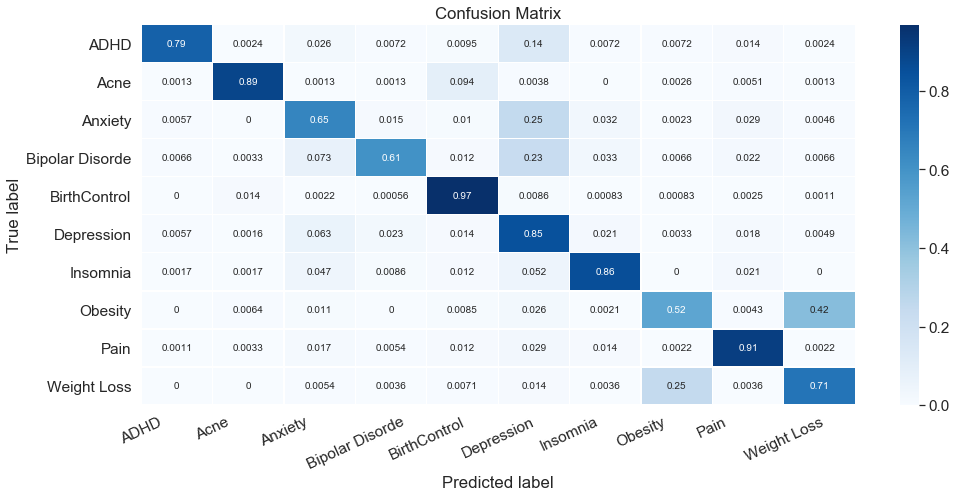

In [294]:
# Confusion Matrix Better Visualization

matrix = cm
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
tick_marks = np.arange(len(target_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, target_names, rotation=25)
plt.yticks(tick_marks2, target_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [411]:
## finding the calculated posterior probability
posterior_probs = nb_clf.predict_proba(X_test_vec)

## finding the posterior probabilities for the first test example
print(posterior_probs[0])

# finding the category prediction for the first test example
y_pred = nb_clf.predict(X_test_vec)
print(y_pred[0])

# checking the actual label for the first test example
print(y_test[0])

[2.96740529e-22 8.75039159e-20 3.75223704e-09 5.23811096e-15
 6.11698300e-13 9.99999996e-01 4.10941076e-19 2.29303158e-27
 2.46209956e-10 4.15971248e-28]
Depression
Depression


In [292]:
# Error Analysis of MNB to see the misclassified Conditions

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='Obesity' and y_pred[i]=='Weight Loss'):
        #print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

errors: 196


# Bernoulli Naive Bayes Hold Out Test

In [109]:
#  unigram boolean vectorizer for BNB Algorithm

unigram_bool_vectorizer_bnb = CountVectorizer(encoding='latin-1', binary=True, min_df=5,stop_words='english')


In [110]:
# Initializing the BNB model and using the training data to train the BNB model

from sklearn.naive_bayes import BernoulliNB
X_train_vec_bool = unigram_bool_vectorizer_bnb.fit_transform(X_train)
be_clf = BernoulliNB()
bernoulliNB_clf = be_clf.fit(X_train_vec_bool, y_train)

In [111]:
# Vectorize the test data using boolean input for Bernoulli

X_test_vec_bol = unigram_bool_vectorizer_bnb.transform(X_test)

In [112]:
# testing the classifier on the test data set, printing accuracy score for BNB

bernoulliNB_clf.score(X_test_vec_bol,y_test)

0.8248677776668996

In [113]:
# Most informative and least informative features for a specific condition helping in prediction of condition for BNB

show_most_and_least_informative_features(unigram_bool_vectorizer_bnb, be_clf, class_idx=1, n=50)

	-8.0602	00pm           		-2.0105	sever          
	-8.0602	06             		-1.9872	notic          
	-8.0602	0mg            		-1.9689	ani            
	-8.0602	100lb          		-1.9644	look           
	-8.0602	100mcg         		-1.9377	better         
	-8.0602	101            		-1.9139	don            
	-8.0602	102            		-1.9096	pill           
	-8.0602	103            		-1.9096	red            
	-8.0602	104            		-1.9075	doctor         
	-8.0602	105lbs         		-1.9011	stop           
	-8.0602	105mg          		-1.8740	medic          
	-8.0602	106            		-1.8577	cystic         
	-8.0602	107            		-1.8376	result         
	-8.0602	108            		-1.8357	product        
	-8.0602	109            		-1.8278	went           
	-8.0602	10am           		-1.8239	breakout       
	-8.0602	10lb           		-1.8219	everi          
	-8.0602	10mgs          		-1.8064	did            
	-8.0602	10min          		-1.7968	recommend      
	-8.0602	10pm           		-1.7705	dermatologist  


In [127]:
# print confusion matrix for BNB Algorithm

from sklearn.metrics import confusion_matrix
y_pred = bernoulliNB_clf.fit(X_train_vec_bool, y_train).predict(X_test_vec_bol)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 332    0    9    6    0   24    9    2   36    1]
 [   1  672    1    2   81    1    1    2   19    0]
 [  11    0  543   21    1  172   37    3   88    0]
 [   8    1   31  401    2   78   21    3   57    1]
 [   2   44    9    5 3445   22    5    4   53    7]
 [  12    2  105   53    7  890   35    8  102    5]
 [   2    1   28    7    0   14  482    1   42    3]
 [   1    1    3    0    1    7    2  285   19  150]
 [   1    3   13    2    3   14    9    3  869    2]
 [   1    0    5    3    6    9    2  179    8  347]]


In [ ]:
# Confusion Matrix Better Visualization

matrix = cm
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
tick_marks = np.arange(len(target_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, target_names, rotation=25)
plt.yticks(tick_marks2, target_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [128]:
# print classification report for BNB

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['ADHD','Acne','Anxiety','Bipolar Disorde','BirthControl','Depression','Insomnia','Obesity','Pain','Weight Loss']
print(classification_report(y_test, y_pred, target_names=target_names))

[0.89487871 0.9281768  0.72690763 0.802      0.9715172  0.72298944
 0.79933665 0.58163265 0.67208043 0.67248062]
[0.79236277 0.86153846 0.61986301 0.66500829 0.9580089  0.73010664
 0.83103448 0.60767591 0.94559304 0.61964286]
                 precision    recall  f1-score   support

           ADHD       0.89      0.79      0.84       419
           Acne       0.93      0.86      0.89       780
        Anxiety       0.73      0.62      0.67       876
Bipolar Disorde       0.80      0.67      0.73       603
   BirthControl       0.97      0.96      0.96      3596
     Depression       0.72      0.73      0.73      1219
       Insomnia       0.80      0.83      0.81       580
        Obesity       0.58      0.61      0.59       469
           Pain       0.67      0.95      0.79       919
    Weight Loss       0.67      0.62      0.64       560

       accuracy                           0.82     10021
      macro avg       0.78      0.76      0.77     10021
   weighted avg       0.83     

In [258]:
# Error Analysis of MNB to see the misclassified Conditions

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]=='Insomnia' and y_pred[i]=='Weight Loss'):
        #print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

errors: 0


# MNB and BNB Cross Validation

In [443]:
# cross validation MNB TF Input Count Vectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5,ngram_range=(1,2),stop_words='english')),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=10)
avg=sum(scores)/len(scores)
print(avg)

0.8409337626154741


In [424]:
##Bernoulli with Boolean Input
bNB_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',binary=False,min_df=5)),('bernNB',BernoulliNB())])
scores = cross_val_score(bNB_pipe,X_train,y_train,cv=10)
print(sum(scores)/len(scores))

0.7966482515023533


In [421]:
##Bernoulli with Boolean Input
bNB_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',binary=False,min_df=5)),('bernNB',BernoulliNB())])
scores = cross_val_score(bNB_pipe,X_train,y_train,cv=10)
print(sum(scores)/len(scores))

##MNB TFIDF Vectorizer and TFIDF Input
mNB_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False,min_df=20,ngram_range=(1,2),stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tfidf_pipe,X_train,y_train,cv=10)
print(sum(scores)/len(scores))

##MNB TF Input using TFIDF Vectorizer
mNB_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False,min_df=20,ngram_range=(1,2),stop_words='english')),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tf_pipe,X_train,y_train,cv=10)
print(sum(scores)/len(scores))

##MNB with Bool
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True,min_df=20,ngram_range=(1,2),stop_words='english')),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe,X_train,y_train, cv=3)
avg=sum(scores)/len(scores)
print(avg)

##MNB with TF Uni and Bigram
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',binary=False,min_df=5,ngram_range=(1,2),stop_words='english')),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train,y_train, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.7990681323388146
0.8047822741840693
0.7710532872115154
0.8297785734526074
0.838486298755973


# SVM

In [ ]:
# Vectorization SVM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#  unigram boolean vectorizer
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=20,ngram_range=(1,2),stop_words='english')

#  unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5,stop_words='english')

#  unigram and bigram term frequency vectorizer
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', min_df=5,ngram_range=(1,2),stop_words='english')

#  unigram tfidf vectorizer
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,ngram_range=(1,3) ,min_df=5,stop_words='english')


In [ ]:
# Vectorize the train data for SVM 

X_fit = gram12_count_vectorizer.fit(X_train)
X_transform = X_fit.transform(X_train)
X_train_vec = gram12_count_vectorizer.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(gram12_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(gram12_count_vectorizer.vocabulary_.items())[:50])
# check word index in vocabulary
print(gram12_count_vectorizer.vocabulary_)

In [ ]:
# Vectorize the test data for SVM 

X_test_vec = gram12_count_vectorizer.transform(X_test)


In [239]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1.5)

# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [240]:
# Generating features for a specific condition out of 10 using get feature names

feature_ranks = sorted(zip(svm_clf.coef_[9], unigram_tfidf_vectorizer.get_feature_names()))

In [241]:
# Specific Condition 20 features with their weights that help to see what model has learnt 
condition_category_10 = feature_ranks[-20:]
print("condition category words")
for i in range(0, len(condition_category_10)):
    print(condition_category_10[i])
print()

condition category words
(1.4698331368768094, 'naltrexon')
(1.5097048203240504, 'day contrav')
(1.5117285982542463, '242lbs')
(1.5132443685791939, '37')
(1.514381470170879, 've phentermin')
(1.5335654211765526, '13lbs')
(1.5478735449221066, 'weight')
(1.5654602764273973, 'start 11')
(1.5806048619752824, 'took contrav')
(1.695475292630814, 'prescrib phentermin')
(1.7455209552052904, 'appetit')
(1.7619675020777095, 'qsymia')
(1.7762335175592086, 'victoza')
(1.8009935278707063, 'lost')
(1.9506039917793796, 'pound')
(2.0411488578514794, 'qysmia')
(2.159714902508443, 'belviq')
(2.546948483890118, 'fastin')
(3.510918145061807, 'phentermin')
(3.6150988285452614, 'adipex')



In [225]:
# Getting not specific condition 20 features Ex. Acne in above cell n Not Acne in this cell
not_condition_category_10 = feature_ranks[:20]
print("not condition category")
for i in range(0, len(not_condition_category_10)):
    print(not_condition_category_10[i])
print()

not condition category
(-2.3399709638959583, 'bontril')
(-2.0921119181646732, 'tenuat')
(-2.0547432526629485, 'depress')
(-1.975202489994895, 'phendimetrazin')
(-1.9087638782519591, 'start contrav')
(-1.8438296891608033, 'period')
(-1.7920962251799386, 'acn')
(-1.7060653091519993, 'anxieti')
(-1.6938293828765085, 'alli')
(-1.6934544244498484, 'gain')
(-1.6602181684610355, 'meridia')
(-1.6002518204382812, 'orlistat')
(-1.5793355960242415, 'hcg')
(-1.4023407909456609, 'pain')
(-1.3501819839719853, 'spot')
(-1.3496707786404472, 'yrs old')
(-1.3464538428987578, '75mg')
(-1.3251325669007863, '288')
(-1.2828151767639688, 'start saxenda')
(-1.2824936456774172, 'weight gain')



In [226]:
# testing the classifier on the test data set by printing out the accuracy score for SVM Model
svm_clf.score(X_test_vec,y_test)

0.8457239796427503

In [211]:
# Generating classification Report and Confusion Matrix for SVM Model
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['ADHD','Acne','Anxiety','Bipolar Disorde','BirthControl','Depression','Insomnia','Obesity','Pain','Weight Loss']
print(classification_report(y_test, y_pred, target_names=target_names))

[[ 357    0    8    3    7   31    4    3    6    0]
 [   0  687    0    0   86    2    1    1    2    1]
 [   9    0  616   19   13  166   26    0   25    2]
 [   9    2   28  420   12   96   14    5   13    4]
 [   1   46    5    0 3515   12    3    2   10    2]
 [  13    1  104   44   28  961   35    3   24    6]
 [   1    1   30    3    8   24  489    0   23    1]
 [   2    1    4    1    8    9    2  277    5  160]
 [   1    4   19    6    8   25   13    5  837    1]
 [   2    1    5    3    8    5    1  169    3  363]]

                 precision    recall  f1-score   support

           ADHD       0.90      0.85      0.88       419
           Acne       0.92      0.88      0.90       780
        Anxiety       0.75      0.70      0.73       876
Bipolar Disorde       0.84      0.70      0.76       603
   BirthControl       0.95      0.98      0.96      3596
     Depression       0.72      0.79      0.75      1219
       Insomnia       0.83      0.84      0.84       580
        Obe

# SVM Cross Validation 3 types Boolean, TF, TFIDF

In [ ]:
# Cross validation for LinearSVC using Count Vectorizer TF Input

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
svm_clf = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5,stop_words='english')),('svm', LinearSVC(C=0.2, penalty='l1', dual=False))])
scores= cross_val_score(svm_clf, X_train, y_train, cv=5)
print(scores)
avg=sum(scores)/len(scores)
print(avg)

In [ ]:
# Cross validation for LinearSVC using Count Vectorizer Boolean Input

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
svm_clf = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True,ngram_range = (1,2), min_df=5,stop_words='english')),('svm', LinearSVC(C=1.5, penalty='l1', dual=False))])
scores= cross_val_score(svm_clf, X_train, y_train, cv=5)
print(scores)
avg=sum(scores)/len(scores)
print(avg)

In [245]:
# Cross validation for LinearSVC using TFIDF Vectorizer TFIDF Input 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
svm_clf = Pipeline([('vect', TfidfVectorizer(encoding='latin-1',use_idf=True, binary=False,ngram_range = (1,3), min_df=5,stop_words='english')),('svm', LinearSVC(C=0.2, penalty='l1', dual=False))])
scores= cross_val_score(svm_clf, X_train, y_train, cv=5)
print(scores)
avg=sum(scores)/len(scores)
print(avg)

[0.84438903 0.84597156 0.8493014  0.8507984  0.84986896]
0.8480658709493791


# Random Forest Cross Validation

In [ ]:
# Vectorization RF

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#  unigram boolean vectorizer
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=20,ngram_range=(1,2),stop_words='english')

#  unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5,stop_words='english')

#  unigram and bigram term frequency vectorizer
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', min_df=5,ngram_range=(1,2),stop_words='english')

#  unigram tfidf vectorizer
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,ngram_range=(1,3) ,min_df=5,stop_words='english')


In [ ]:
# Vectorize the train data for RF Model

X_fit = gram12_count_vectorizer.fit(X_train)
X_transform = X_fit.transform(X_train)
X_train_vec = gram12_count_vectorizer.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(gram12_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(gram12_count_vectorizer.vocabulary_.items())[:50])
# check word index in vocabulary
print(gram12_count_vectorizer.vocabulary_)

In [ ]:
# Vectorize the test data for RF Model 

X_test_vec = gram12_count_vectorizer.transform(X_test)


In [456]:
# Random Forest using Count Vectorizer Boolean/TF Input
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',ngram_range = (1,3),binary=True,min_df=20)),('rf', RandomForestClassifier(n_estimators=80,max_depth=10,random_state=0))])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.4029890088199168


In [ ]:
# Random Forest using TFIDF Vectorizer TF/TFIDF Input
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', TfidfVectorizer(encoding='latin-1',use_idf=False,ngram_range = (1,2),binary=True,min_df=20)),('rf', RandomForestClassifier(n_estimators=80,max_depth=10,random_state=0))])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

In [251]:
# import the Random Forest module
from sklearn.ensemble import RandomForestClassifier

# initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=80,max_depth=10,random_state=0)

# using the training data to train the Random Forest model
rf_clf.fit(X_train_vec,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [252]:
# testing the classifier on the test data set by printing out the accuracy score for Random Forest Model

rf_clf.score(X_test_vec,y_test)

0.4228120946013372

In [253]:
# print confusion matrix and classification report for RF Model

from sklearn.metrics import confusion_matrix
y_pred = rf_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['ADHD','Acne','Anxiety','Bipolar Disorde','BirthControl','Depression','Insomnia','Obesity','Pain','Weight Loss']
print(classification_report(y_test, y_pred, target_names=target_names))

[[  12    0    0    1  404    1    1    0    0    0]
 [   0  243    0    0  537    0    0    0    0    0]
 [   0    0  101    0  745   25    4    0    1    0]
 [   0    0    3   16  575    8    1    0    0    0]
 [   0    1    0    0 3595    0    0    0    0    0]
 [   0    0   15    0 1114   88    1    0    1    0]
 [   0    0    4    0  493    2   80    0    1    0]
 [   0    0    0    0  455    0    0    0    0   14]
 [   0    0    0    0  847    1    0    0   71    0]
 [   0    0    0    0  529    0    0    0    0   31]]


C:\Users\hites\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[1.         0.99590164 0.82113821 0.94117647 0.38680869 0.704
 0.91954023 0.         0.95945946 0.68888889]
[0.02863962 0.31153846 0.1152968  0.026534   0.99972191 0.07219032
 0.13793103 0.         0.07725789 0.05535714]


C:\Users\hites\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

           ADHD       1.00      0.03      0.06       419
           Acne       1.00      0.31      0.47       780
        Anxiety       0.82      0.12      0.20       876
Bipolar Disorde       0.94      0.03      0.05       603
   BirthControl       0.39      1.00      0.56      3596
     Depression       0.70      0.07      0.13      1219
       Insomnia       0.92      0.14      0.24       580
        Obesity       0.00      0.00      0.00       469
           Pain       0.96      0.08      0.14       919
    Weight Loss       0.69      0.06      0.10       560

       accuracy                           0.42     10021
      macro avg       0.74      0.18      0.20     10021
   weighted avg       0.65      0.42      0.31     10021

